In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])#Kategorik değişkenleri dummy değişkenlere çeviriyoruz.
y=df[["Salary"]]
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [4]:
#Model & Tahmin

In [5]:
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [6]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [7]:
y_pred=rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))
#İlkel test Hatası

373.04044281427

Model Tuning

In [8]:
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [9]:
#max_features=Değ. göz önünde bulundurlması gereken değişken sayısı

In [10]:
rf_params={"max_depth":[5,8,10],
          "max_features":[2,5,10],
          "n_estimators":[200,500,1000,2000],
          "min_samples_split":[2,10,80,100]}

In [11]:
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.7min finished


In [12]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [13]:
rf_model=RandomForestRegressor(random_state=42,
                              max_depth=8,
                              max_features=2,
                              min_samples_split=2,
                              n_estimators=200)
rf_tuned=rf_model.fit(X_train,y_train)

In [14]:
rf_tuned

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [15]:
y_pred=rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

348.2372919119422

#Değişken Önem Düzeyi 
Hiper parametre optimizasyonu & Değişkenlerin önemi üzerine bir çalışma

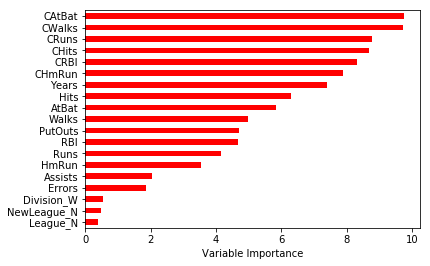

In [16]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by="Importance",
                       axis=0,
                      ascending=True).plot(kind="barh",
                                          color="r")
plt.xlabel("Variable Importance")
plt.gca().legend_=None